In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import doctest
%matplotlib inline

In [26]:
x0 = cv2.imread('samples/x0.png', cv2.IMREAD_GRAYSCALE)
x1 = cv2.imread('samples/x1.png', cv2.IMREAD_GRAYSCALE)
h, w = x0.shape
x01 = [x0, x1]

In [19]:
T = [0, 1]
N = ['I', 'I_', 
     'V0', 'V0_', 'V1', 'V1_', 
     'R1', 'R0', 
     'A00', 'A01', 'A10', 'A11', 
     '1', '0']
gh = [
    ('I', 'V0', 'I'),
    ('I_', 'V0_', 'I'),
    ('I', 'V1', 'I_' ),
    ('I_', 'V1_', 'I_'),
    
    ('V1', 'V0_', 'I'),
    ('V1_', 'V0_', 'I'),
    ('V0', 'V0', 'I'),
    ('V0_', 'V0', 'I'),
    
    ('V1', 'V1_', 'I_'),
    ('V1_', 'V1_', 'I_'),
    ('V0', 'V1', 'I_'),
    ('V0_', 'V1', 'I_'),
]
gv = [
    ('A00', 'R0', 'V0'),
    ('A01', 'R1', 'V0'),
    ('A10', 'R1', 'V0'),
    ('A11', 'R0', 'V0_'),
    
    ('A00', 'R1', 'V1'),
    ('A10', 'R0', 'V1_'),
    ('A01', 'R0', 'V1_'),
    ('A11', 'R0', 'V1_'),
    
    ('0', '0', 'A00'),
    ('0', '1', 'A01'),
    ('1', '0', 'A10'),
    ('1', '1', 'A11'),   
]
g = [
    (0, 'R0'),
    (0, '0'),
    (1, 'R1'),
    (1, '1'), 
]

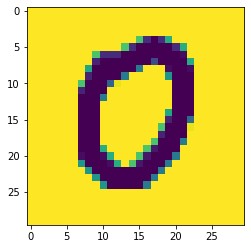

In [5]:
plt.imshow(x0)

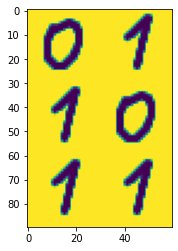

In [27]:
sample = cv2.imread('samples/sample_1.png', cv2.IMREAD_GRAYSCALE)
cols = int(len(sample[0]) / w)
plt.imshow(sample)

In [29]:
f = dict()
for i in range(3):
    for j in range(cols):
        for i_ in range(i, 3):
            for j_ in range(j, cols):
                for t in T:
                    block = crop(sample, i, i_, j, j_, h, w)
                    if block.shape == (h, w):
                        f[i, i_, j, j_, t] = (block==x01[t]).all()
                    else:
                        f[i, i_, j, j_, t] = False
                for n in N:
                    f[i, i_, j, j_, n] = False
f

{(0, 0, 0, 0, 0): True,
 (0, 0, 0, 0, 1): False,
 (0, 0, 0, 0, 'I'): False,
 (0, 0, 0, 0, 'I_'): False,
 (0, 0, 0, 0, 'V0'): False,
 (0, 0, 0, 0, 'V0_'): False,
 (0, 0, 0, 0, 'V1'): False,
 (0, 0, 0, 0, 'V1_'): False,
 (0, 0, 0, 0, 'R1'): False,
 (0, 0, 0, 0, 'R0'): False,
 (0, 0, 0, 0, 'A00'): False,
 (0, 0, 0, 0, 'A01'): False,
 (0, 0, 0, 0, 'A10'): False,
 (0, 0, 0, 0, 'A11'): False,
 (0, 0, 0, 0, '1'): False,
 (0, 0, 0, 0, '0'): False,
 (0, 0, 0, 1, 0): False,
 (0, 0, 0, 1, 1): False,
 (0, 0, 0, 1, 'I'): False,
 (0, 0, 0, 1, 'I_'): False,
 (0, 0, 0, 1, 'V0'): False,
 (0, 0, 0, 1, 'V0_'): False,
 (0, 0, 0, 1, 'V1'): False,
 (0, 0, 0, 1, 'V1_'): False,
 (0, 0, 0, 1, 'R1'): False,
 (0, 0, 0, 1, 'R0'): False,
 (0, 0, 0, 1, 'A00'): False,
 (0, 0, 0, 1, 'A01'): False,
 (0, 0, 0, 1, 'A10'): False,
 (0, 0, 0, 1, 'A11'): False,
 (0, 0, 0, 1, '1'): False,
 (0, 0, 0, 1, '0'): False,
 (0, 1, 0, 0, 0): False,
 (0, 1, 0, 0, 1): False,
 (0, 1, 0, 0, 'I'): False,
 (0, 1, 0, 0, 'I_'): False,
 (0, 1

In [17]:
def crop(img, i, i_, j, j_, h, w):
    """
    >>> (crop(sample, 1,1,0,0, h, w)==x1).all()
    True
    """
    return img[i*h:(i_+1)*h, j*w: (j_+1)*w]
doctest.testmod()

TestResults(failed=0, attempted=1)